In [1]:
%matplotlib inline
import GEOparse
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklego.linear_model import LowessRegression
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [3]:
from Scripts.Utils.datasets import get_dataset

In [4]:
table = get_dataset("Asakura2020")

In [5]:
table

,CACUAGAUUGUGAGCUCCUGGA,AGGGCUUAGCUGCUUGUGAGCA,CAAAGCGCUCCCCUUUAGAGGU,AAAGUGCUUCCUUUUAGAGGG,UUUCAAGCCAGGGGGCGUUUUUC,AAGUGCUGUCAUAGCUGAGGUC,AGUGGGGAACCCUUCCAUGAGG,CAACCUGGAGGACUCCAUGCUG,AACUGUUUGCAGAGGAAACUGA,AAACCGUUACCAUUACUGAGUU,...,UCGCGCCCCGGCUCCCGUUC,UCGGGGAGUCUGGGGUCCGGAAU,AUCUGUCUCGAUUGUUUCCAG,UGGGGUAAGGAUAGGAGGGUCA,CCGCCUUCUCUCCUCCCCCAG,CAGAGGGAAUACAGAGGGCAAU,CCCAUGCCUCCUGCCGCGGUC,UAGGUGGCAGAGGAGGGACUUCA,GUGAGACUUCUCUCCCUUCAG,cancer
0,1.495613,-0.395014,1.385363,1.454914,0.700428,1.169944,0.348078,1.472603,-0.535122,-0.567639,...,-3.465061,-0.458474,0.307273,-0.764700,-0.405724,-0.144541,-1.508195,-0.102970,0.729732,0
1,1.013091,-0.755308,-0.474284,-0.075365,-0.279364,-0.950645,-0.914817,-1.148787,-0.954185,0.740353,...,-0.505362,-0.493698,-0.122266,-1.198784,-0.044684,-0.557790,0.015637,0.517082,-0.726571,0
2,1.194627,0.900890,0.359714,0.411139,-0.291765,1.101026,-0.380872,0.841776,0.874083,-1.140299,...,-0.778673,-0.635119,-0.236970,0.278019,-0.070498,-0.668144,-0.024889,0.203827,0.635459,0
3,1.973499,2.130799,0.969049,1.301086,0.509325,1.263780,0.555565,1.506257,-0.272043,-0.469523,...,-0.420946,0.254997,1.992267,1.290795,0.683392,1.626837,0.733405,1.119008,1.900744,0
4,1.812708,0.704497,0.730849,-0.054396,0.482599,1.740452,0.197360,-0.320340,1.862298,0.411115,...,-2.856915,-0.754077,0.704325,-0.363448,-2.884351,0.237452,-2.555235,-1.819326,0.066851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,-0.859671,-0.733026,-1.501876,-0.777126,0.356480,-0.873919,-3.315638,-1.069936,-0.877430,-4.310916,...,-0.695429,-0.880283,-0.043592,-1.119277,-2.149349,-0.482099,-3.656526,0.912678,-0.651054,1
3920,-0.885103,-0.758189,-1.530217,-0.802367,-1.496752,-0.899392,-3.352622,-1.096115,-0.902913,-4.352361,...,-4.042473,-0.336530,-0.069712,-0.749293,0.120732,-0.507229,-0.579959,1.490264,-0.676126,1
3921,-1.027439,-0.899022,-1.688837,-0.943632,0.189870,-1.041962,-0.953015,-1.242631,-1.045535,-4.584322,...,-0.711038,-0.097942,-0.215900,1.086192,0.157930,-0.647872,-3.910246,1.254709,-0.816448,1
3922,-0.713073,-0.587975,1.095939,-0.631631,0.881225,-0.727079,-0.006610,0.827450,-0.730536,1.304198,...,0.796648,0.348454,0.106974,1.478391,0.593367,1.764854,0.372867,1.394929,1.637505,1


In [10]:
pca = decomposition.PCA(n_components=10)
pca.fit(table.iloc[:, :-1])

PCA(n_components=10)

In [11]:
components = pca.transform(table.iloc[:, :-1])

In [12]:
controls = 1 - table["cancer"]

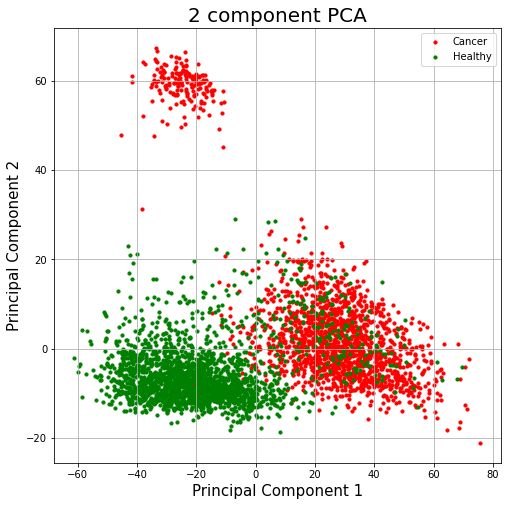

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [24]:
projection = components[:, :2] @ pca.components_[:2]

In [25]:
table2 = table.iloc[:, :-1] - projection

In [26]:
table2["cancer"] = table["cancer"]

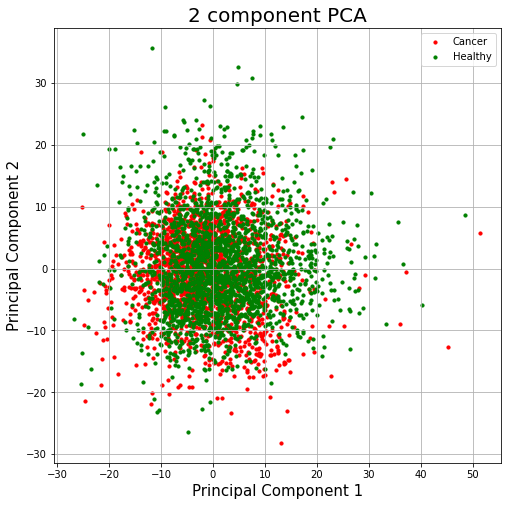

In [28]:
components = pca.transform(table2.iloc[:, :-1])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 2], components[controls == False, 3], c = 'r', s = 10)
ax.scatter(components[controls == True, 2], components[controls == True, 3], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [29]:
table2.to_csv("../TransformedData/Asakura2020_transformed.csv")